<a href="https://colab.research.google.com/github/markuskunej/air-pollution-thesis/blob/master/VARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
DATA_PATH = "/content/Y&E_60m_last40days"
!unzip "/content/Y&E_60m_last40days.zip"

Archive:  /content/Y&E_60m_last40days.zip
  inflating: Y&E_60m_last40days/AQI.csv  
  inflating: Y&E_60m_last40days/CO.csv  
  inflating: Y&E_60m_last40days/CO2.csv  
  inflating: Y&E_60m_last40days/Elevation.csv  
  inflating: Y&E_60m_last40days/Humidity.csv  
  inflating: Y&E_60m_last40days/Latitude.csv  
  inflating: Y&E_60m_last40days/Longitude.csv  
  inflating: Y&E_60m_last40days/NO.csv  
  inflating: Y&E_60m_last40days/NO2.csv  
  inflating: Y&E_60m_last40days/Noise_LEQ.csv  
  inflating: Y&E_60m_last40days/Noise_Max.csv  
  inflating: Y&E_60m_last40days/O3.csv  
  inflating: Y&E_60m_last40days/PM1.csv  
  inflating: Y&E_60m_last40days/PM10.csv  
  inflating: Y&E_60m_last40days/PM2.5.csv  
  inflating: Y&E_60m_last40days/Pressure.csv  
  inflating: Y&E_60m_last40days/Temperature.csv  
  inflating: Y&E_60m_last40days/Wind_Direction.csv  
  inflating: Y&E_60m_last40days/Wind_Gust.csv  
  inflating: Y&E_60m_last40days/Wind_Speed.csv  


In [6]:
import pandas as pd
import os
import glob

DATA_PATH = "/content/Y&E_60m_last40days"
print(os.path.join(DATA_PATH , "/*.csv"))
all_files = glob.glob('/content/Y&E_60m_last40days/*.csv')
keys = []
dfs = []
big_df = []
for file_name in all_files:
  df = pd.read_csv(file_name, parse_dates=["Time"])
  variable_name = os.path.basename(file_name).split(".")[0]
  df[variable_name] = df.mean(axis=1)
  #keys.append(variable_name)
  df.set_index('Time', inplace=True)
  df.info()
  df = df.tz_localize(tz='US/Eastern', ambiguous='infer')
  df.info()
  print(df[df.index.duplicated(keep=False)])

  # reduce dataframe columns to only the average
  df = df[[variable_name]]

  print(df.index)
  dfs.append(df)

# concat dataframes into one
big_df = pd.concat(dfs, axis=1)
print(big_df.shape)
print(big_df.head())

/*.csv
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 962 entries, 2022-10-09 11:00:00 to 2022-11-18 10:48:24
Data columns (total 11 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Pressure {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}  962 non-null    int64  
 1   Pressure {DeviceID="AirSENCE-032206C140232", name="Pollutant"}  962 non-null    int64  
 2   Pressure {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}  962 non-null    int64  
 3   Pressure {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}  962 non-null    int64  
 4   Pressure {DeviceID="AirSENCE-1021BFD040215", name="Pollutant"}  962 non-null    int64  
 5   Pressure {DeviceID="AirSENCE-1021C46E40217", name="Pollutant"}  962 non-null    int64  
 6   Pressure {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}  962 non-null    int64  
 7   Pressure 

<ipython-input-6-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[variable_name] = df.mean(axis=1)
<ipython-input-6-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[variable_name] = df.mean(axis=1)
<ipython-input-6-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[variable_name] = df.mean(axis=1)
<ipython-input-6-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[variable_name] = df.mean(axis=1)
<ipython-input-6-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 962 entries, 2022-10-09 10:00:00-04:00 to 2022-11-18 09:56:15-05:00
Data columns (total 8 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   CO2 {DeviceID="AirSENCE-0322068B40233", name="Pollutant"}  940 non-null    float64
 1   CO2 {DeviceID="AirSENCE-032206C140232", name="Pollutant"}  940 non-null    float64
 2   CO2 {DeviceID="AirSENCE-0322223F40230", name="Pollutant"}  962 non-null    int64  
 3   CO2 {DeviceID="AirSENCE-032223EF40231", name="Pollutant"}  628 non-null    float64
 4   CO2 {DeviceID="AirSENCE-1021C53740216", name="Pollutant"}  962 non-null    int64  
 5   CO2 {DeviceID="AirSENCE-1021C65A40214", name="Pollutant"}  962 non-null    int64  
 6   CO2 {DeviceID="AirSENCE-1021C6C640218", name="Pollutant"}  962 non-null    int64  
 7   CO2                                               

<ipython-input-6-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[variable_name] = df.mean(axis=1)
<ipython-input-6-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[variable_name] = df.mean(axis=1)
<ipython-input-6-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[variable_name] = df.mean(axis=1)
<ipython-input-6-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[variable_name] = df.mean(axis=1)
<ipython-input-6-4c30d078367a>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64

(983, 20)
                           Pressure  Noise_Max     NO  Wind_Gust  Noise_LEQ  \
Time                                                                          
2022-10-09 10:00:00-04:00       NaN        NaN    NaN        NaN        NaN   
2022-10-09 11:00:00-04:00     999.1      62.00  14.53        NaN      57.88   
2022-10-09 12:00:00-04:00     999.4      61.99  15.85      2.566      58.07   
2022-10-09 13:00:00-04:00     999.4      62.47  17.85      2.176      58.45   
2022-10-09 14:00:00-04:00     999.2      62.81  17.10      1.894      58.88   

                           Wind_Direction  Longitude    PM2     CO2  Humidity  \
Time                                                                            
2022-10-09 10:00:00-04:00             NaN        NaN    NaN  457.25       NaN   
2022-10-09 11:00:00-04:00             NaN      -79.4  2.778  452.75     59.49   
2022-10-09 12:00:00-04:00           271.4      -79.4  2.640  449.75     52.48   
2022-10-09 13:00:00-04:00      

In [7]:
#see how many nan values exist now
print(big_df.isnull().sum())

# delete rows from beginning and end that contain NaN values (since date range for each variable is not the same)

# drop nan rows from beginning
while(big_df.iloc[0].isnull().values.any() == True):
  big_df.drop(index=big_df.index[0], axis=0, inplace=True)

#drop nan rows from end
while(big_df.iloc[-1].isnull().values.any() == True):
  big_df.drop(index=big_df.index[-1], axis=0, inplace=True)

#see how many nan values exist after slicing the beginning and end of dataframe
print(big_df.isnull().sum())


Pressure          21
Noise_Max         21
NO                21
Wind_Gust         21
Noise_LEQ         21
Wind_Direction    21
Longitude         21
PM2               21
CO2               21
Humidity          21
O3                21
CO                21
Wind_Speed        21
Elevation         21
PM10              21
Temperature       21
NO2               21
AQI               21
Latitude          21
PM1               21
dtype: int64
Pressure          0
Noise_Max         0
NO                0
Wind_Gust         0
Noise_LEQ         0
Wind_Direction    0
Longitude         0
PM2               0
CO2               0
Humidity          0
O3                0
CO                0
Wind_Speed        0
Elevation         0
PM10              0
Temperature       0
NO2               0
AQI               0
Latitude          0
PM1               0
dtype: int64


Plot Current Data

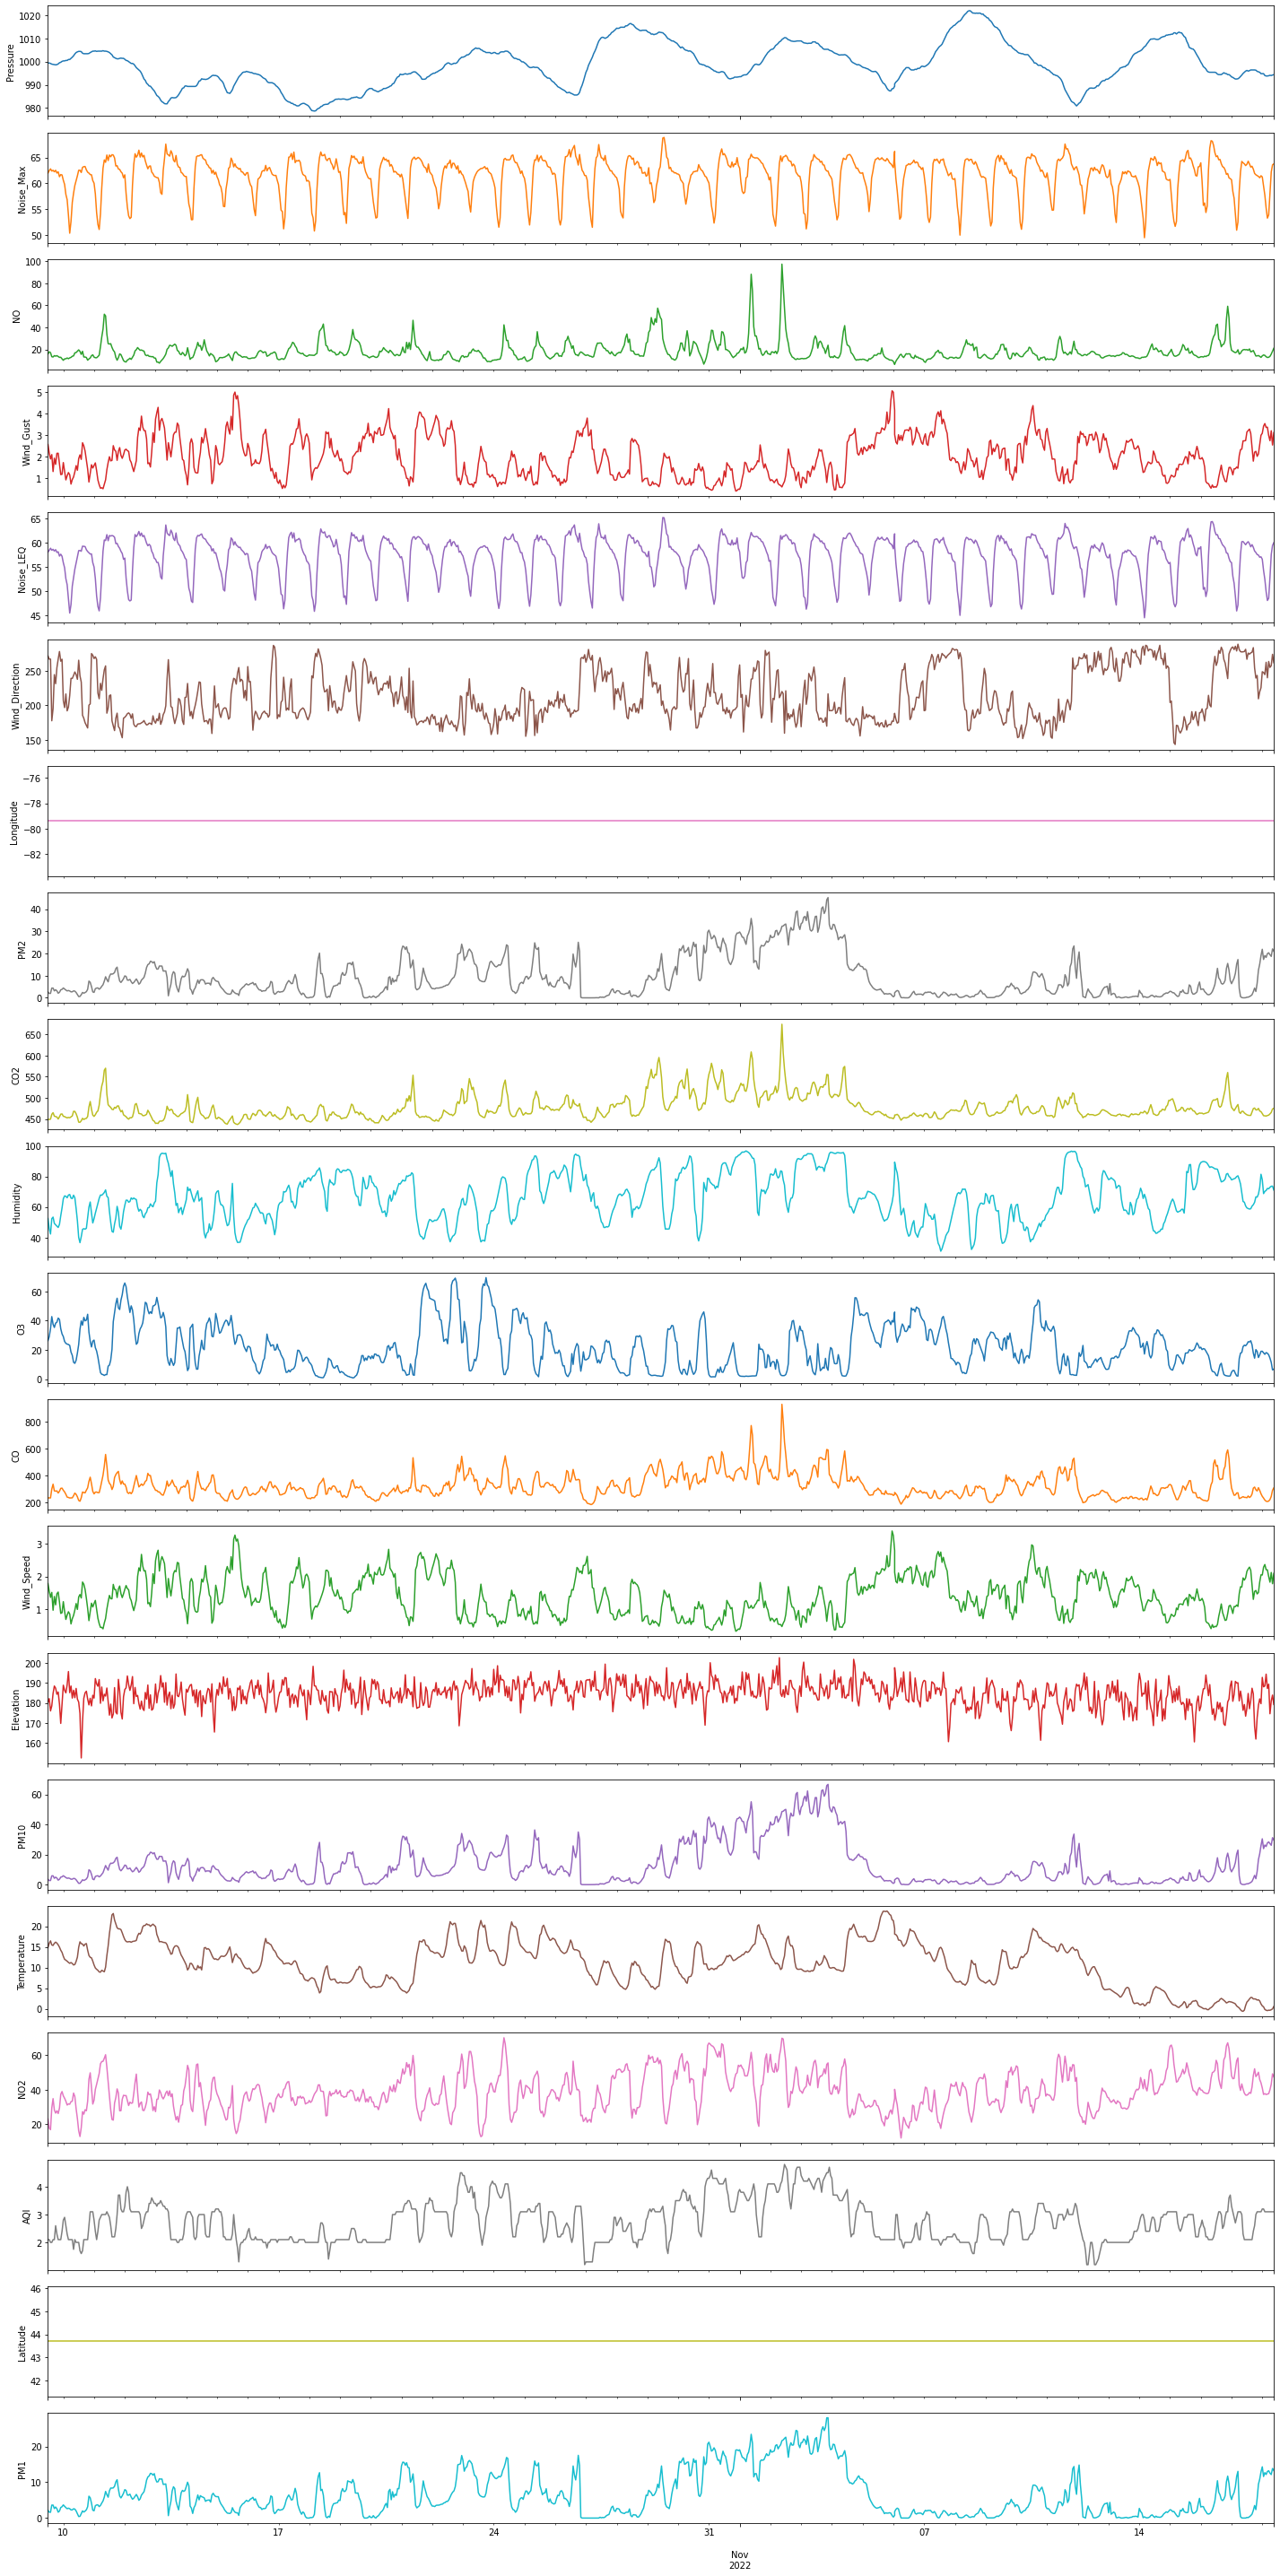

In [8]:
import matplotlib.pyplot as plt

def plot_df(df):
  plot_cols = df.columns
  fig,ax = plt.subplots(len(plot_cols), figsize=(20,40), sharex=True)
  df.plot(subplots=True, legend=False, ax=ax)
  for a in range(len(ax)): 
      ax[a].set_ylabel(plot_cols[a])
  ax[-1].set_xlabel('')
  plt.tight_layout()
  plt.show()

plot_df(big_df)

Remove unhelpful variables

In [9]:
# based on the graphs, remove latitude and longitude.
# Also remove AQI since this number is determined based on pollutant levels (which we already have)
big_df.drop(['AQI', 'Latitude', 'Longitude', 'Elevation'], axis=1, inplace=True)

Augmented Dickey-Fuller Test

In [10]:
# test for stationarity, difference if seasonality exists
# https://michael-fuchs-python.netlify.app/2020/10/29/time-series-analysis-regression-extension-techniques-for-forecasting-multivariate-variables/#stationarity
from statsmodels.tsa.stattools import adfuller

def Augmented_Dickey_Fuller_Test_func(timeseries , column_name):
    '''
    Calculates statistical values whether the available data are stationary or not 
    
    Args:
        series (float64): Values of the column for which stationarity is to be checked, numpy array of floats 
        column_name (str): Name of the column for which stationarity is to be checked
    
    Returns:
        p-value that indicates whether the data are stationary or not
    ''' 
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    adfTest = adfuller(timeseries, autolag='AIC')   # why AIC vs BIC, t-stat, etc.?
    dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
    for key, value in adfTest[4].items():
       dfResults['Critical Value (%s)'%key] = value
    print (dfResults)
    if adfTest[1] <= 0.05:
        print()
        print("Conclusion:")
        print("Reject the null hypothesis")
        print('\033[92m' + "Data is stationary" + '\033[0m')
    else:
        print()
        print("Conclusion:")
        print("Fail to reject the null hypothesis")
        print('\033[91m' + "Data is non-stationary" + '\033[0m')


# Check each column for seasonality
for name, column in big_df.iteritems():
    Augmented_Dickey_Fuller_Test_func(big_df[name],name)
    print('\n')



Results of Dickey-Fuller Test for column: Pressure
ADF Test Statistic       -5.356619
P-Value                   0.000004
# Lags Used              22.000000
# Observations Used     936.000000
Critical Value (1%)      -3.437356
Critical Value (5%)      -2.864633
Critical Value (10%)     -2.568417
dtype: float64

Conclusion:
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: Noise_Max
ADF Test Statistic       -3.742309
P-Value                   0.003556
# Lags Used              22.000000
# Observations Used     936.000000
Critical Value (1%)      -3.437356
Critical Value (5%)      -2.864633
Critical Value (10%)     -2.568417
dtype: float64

Conclusion:
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: NO
ADF Test Statistic       -3.294894
P-Value                   0.015108
# Lags Used              22.000000
# Observations Used     936.000000
Critical Value (1%)      -3.437356
Critical Value (5%)      -2.864633


Since not all variables are stationary, we must perform co-integration test (apparently I could have skipped the dickey-fuller test?)

In [11]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen   #can't use on more than 12 variables

johansenResults = coint_johansen(big_df.iloc[:,:12],-1,1)

print("Trace Stat:")
print(johansenResults.trace_stat)
print("\nTrace Stat Crit Vals:")
print(johansenResults.trace_stat_crit_vals)
print("\nMax Eig stat:")
print(johansenResults.max_eig_stat)
print("\nMax Eig Stat Crit Vals:")
print(johansenResults.max_eig_stat_crit_vals)


Trace Stat:
[1.64796091e+03 1.16710611e+03 9.07638188e+02 7.12072770e+02
 5.56631004e+02 4.20556819e+02 3.07080987e+02 2.07468223e+02
 1.18851798e+02 6.13946345e+01 2.41680060e+01 2.24077283e-05]

Trace Stat Crit Vals:
[[302.9054 311.1288 326.9716]
 [255.6732 263.2603 277.9962]
 [212.4721 219.4051 232.8291]
 [173.2292 179.5199 191.8122]
 [137.9954 143.6691 154.7977]
 [106.7351 111.7797 121.7375]
 [ 79.5329  83.9383  92.7136]
 [ 56.2839  60.0627  67.6367]
 [ 37.0339  40.1749  46.5716]
 [ 21.7781  24.2761  29.5147]
 [ 10.4741  12.3212  16.364 ]
 [  2.9762   4.1296   6.9406]]

Max Eig stat:
[4.80854809e+02 2.59467917e+02 1.95565419e+02 1.55441766e+02
 1.36074185e+02 1.13475832e+02 9.96127643e+01 8.86164252e+01
 5.74571633e+01 3.72266284e+01 2.41679836e+01 2.24077283e-05]

Max Eig Stat Crit Vals:
[[69.6513 73.0946 80.0937]
 [63.7248 67.0756 73.8856]
 [57.7954 61.0404 67.6415]
 [51.8528 54.9629 61.3449]
 [45.893  48.8795 55.0335]
 [39.9085 42.7679 48.6606]
 [33.9271 36.6301 42.2333]
 [27.91

Difference the non-stationary variables

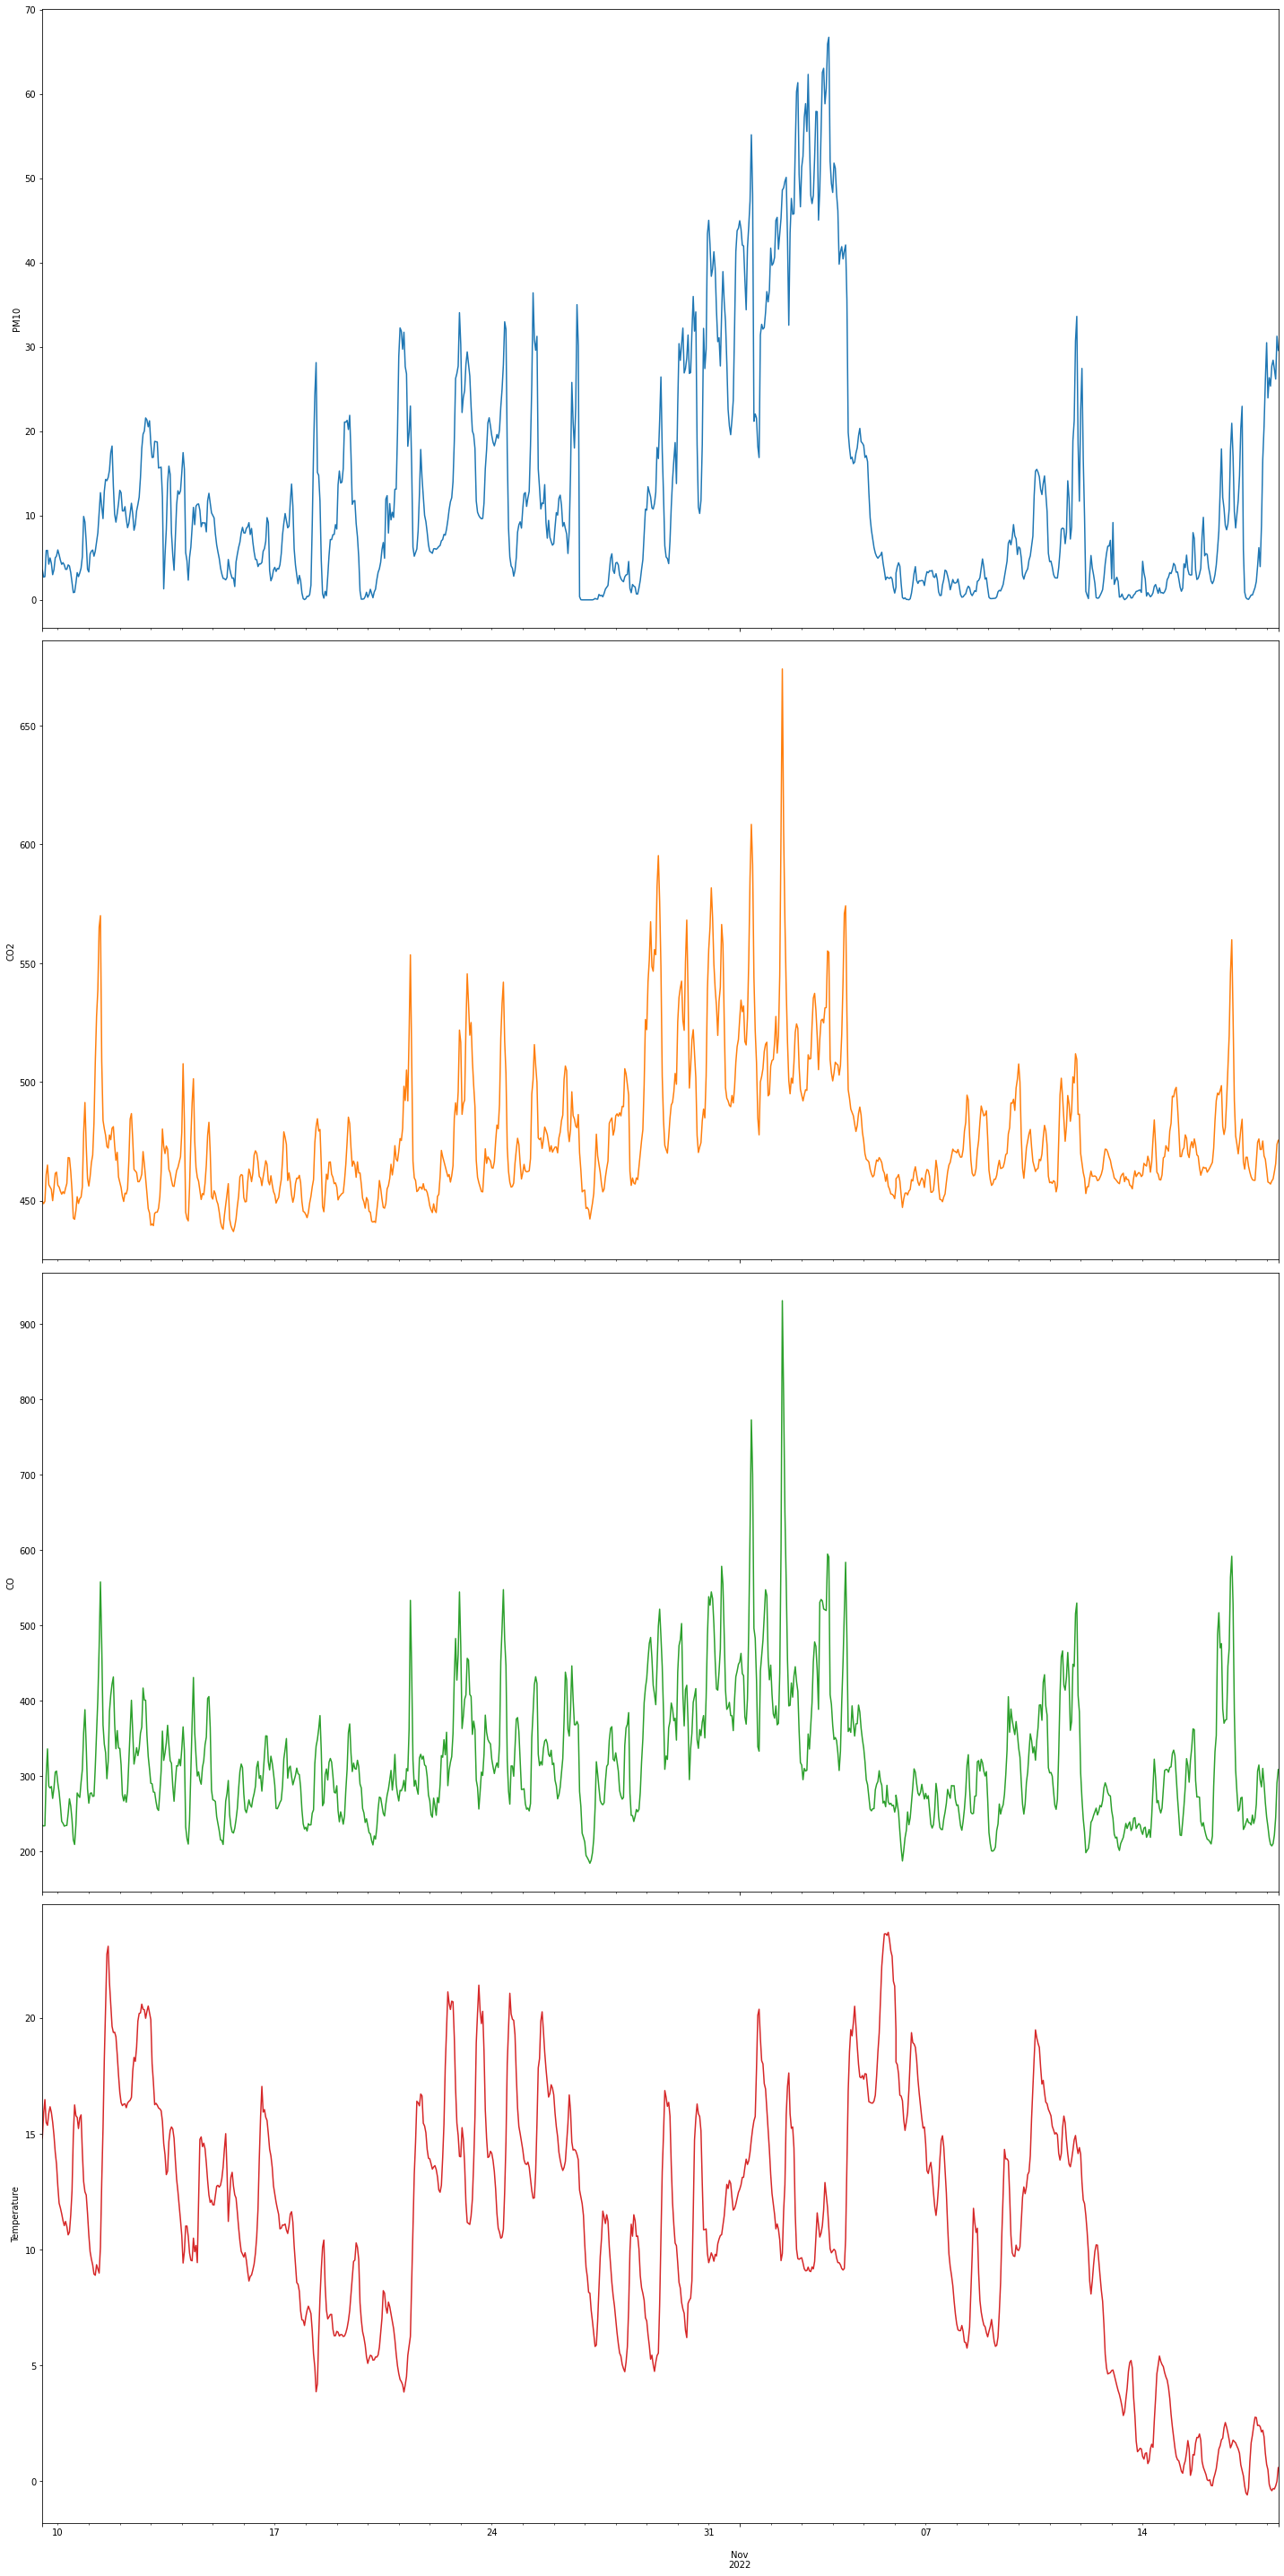

In [12]:
non_stationary_columns = ["PM10", "CO2", "CO", "Temperature"]

# visualize cols before
plot_df(big_df[non_stationary_columns])

In [13]:
# difference non-stationary variables
transformed_big_df = big_df.copy()
transformed_big_df[non_stationary_columns] = transformed_big_df[non_stationary_columns].apply(lambda x: x.diff())

# drop nan rows from beginning, differencing produces a NaN for first value
while(transformed_big_df.iloc[0].isnull().values.any() == True):
  transformed_big_df.drop(index=transformed_big_df.index[0], axis=0, inplace=True)

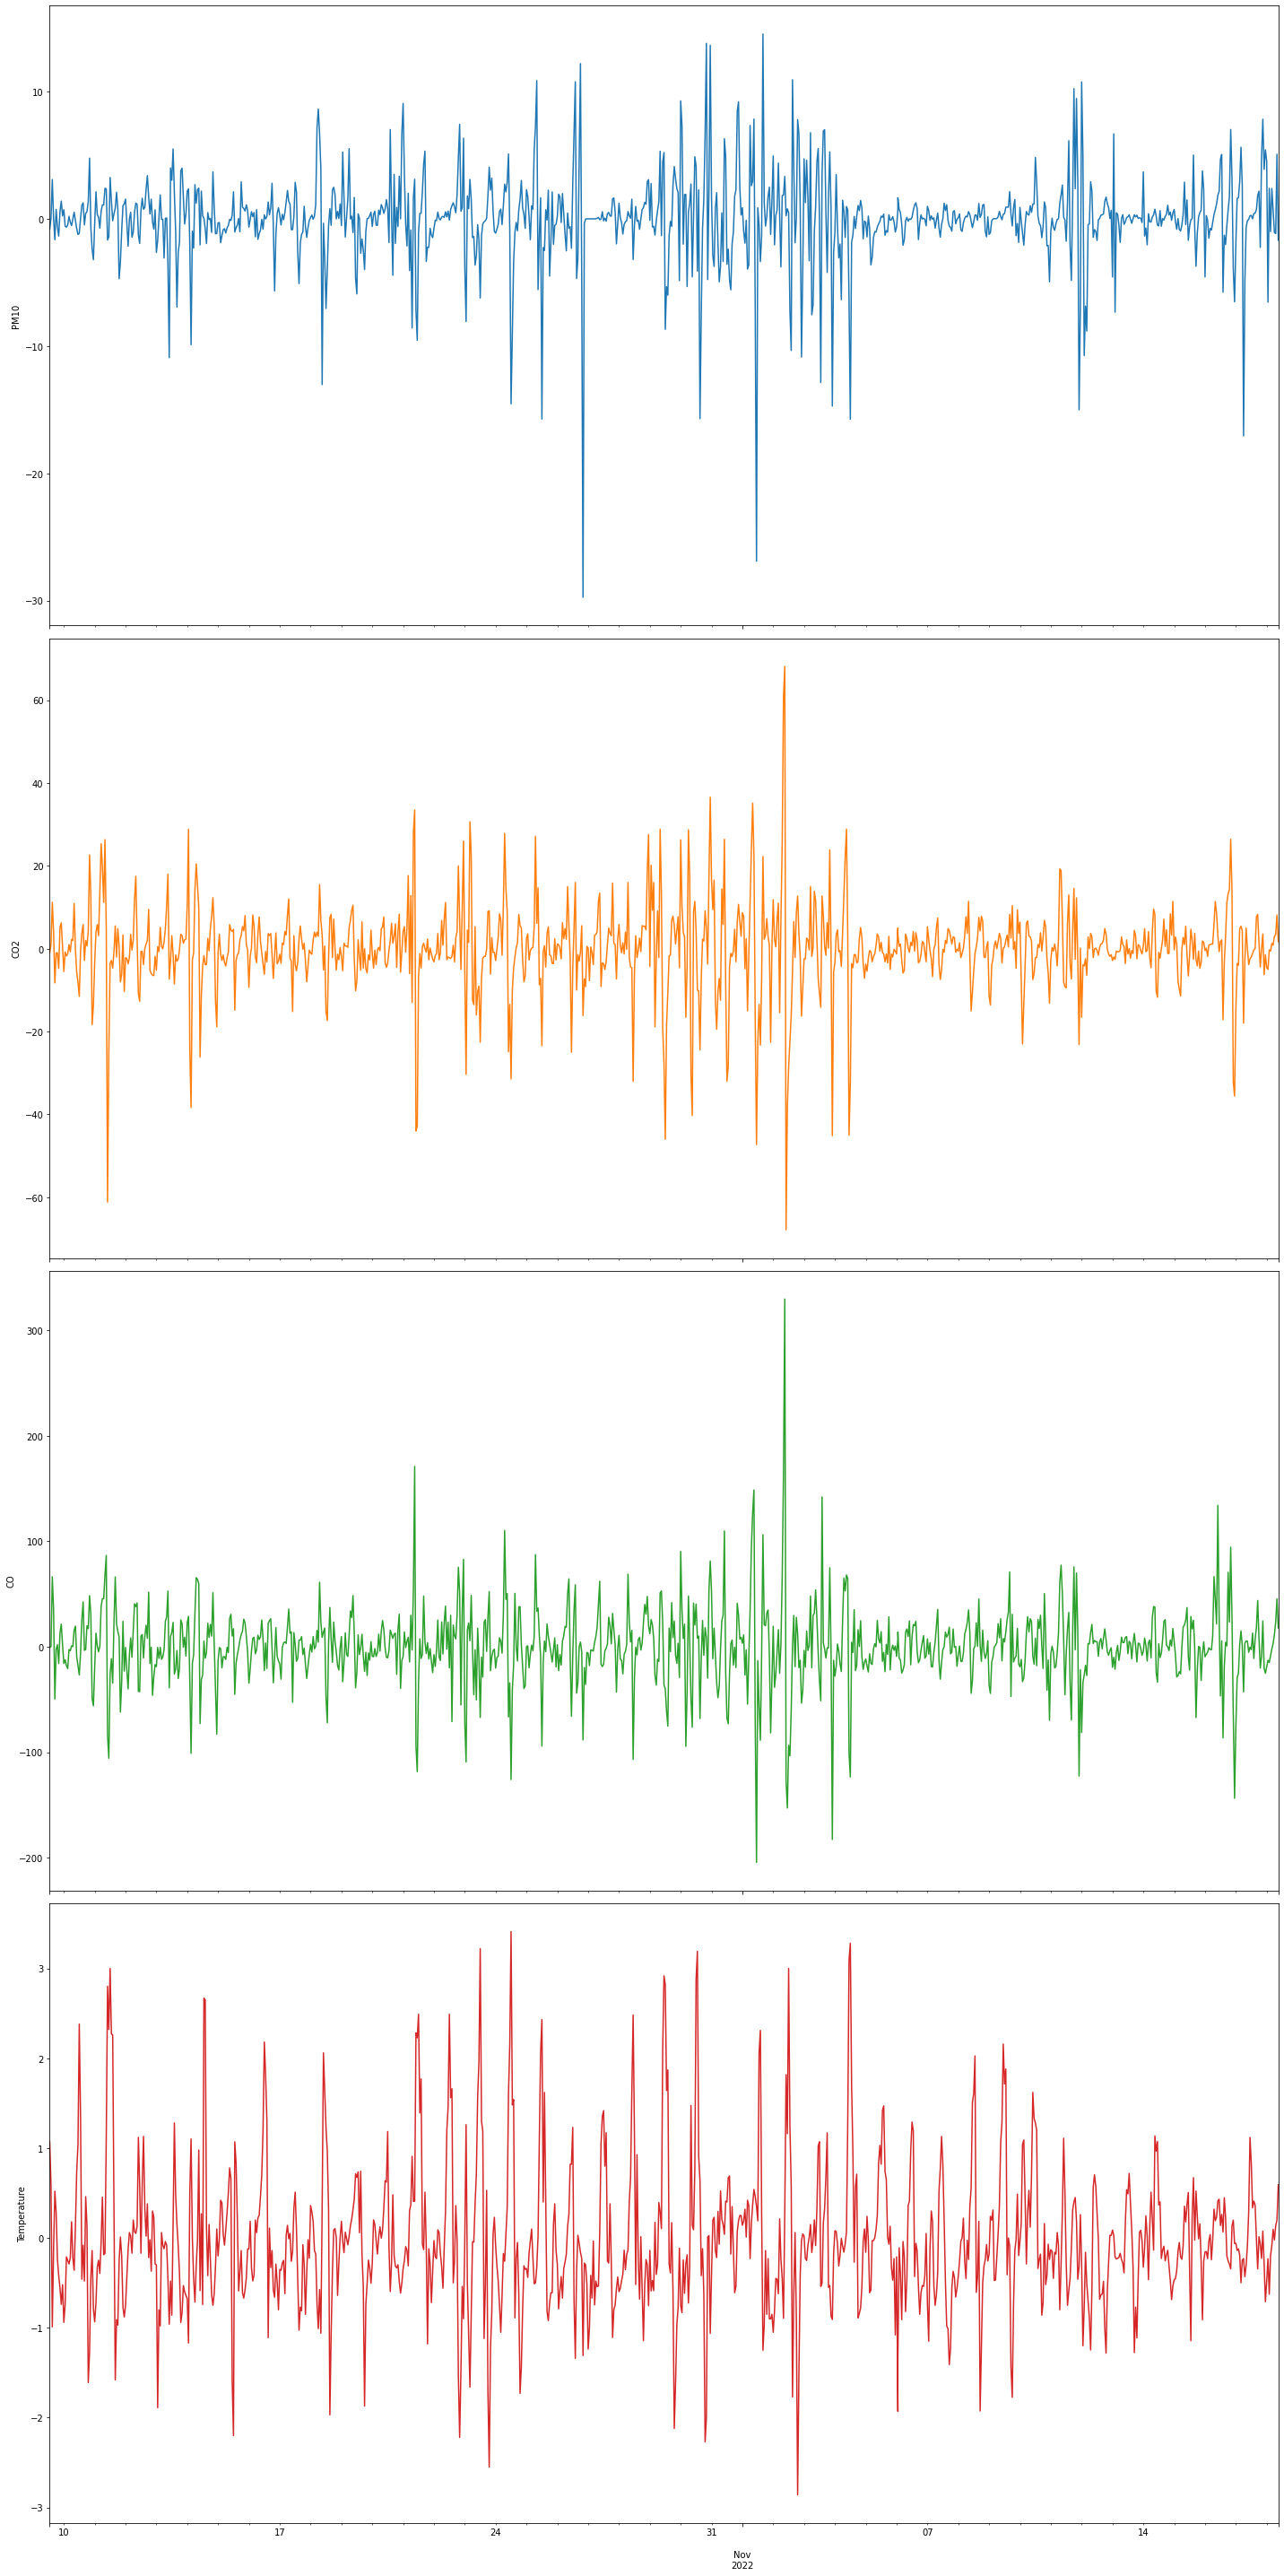

In [14]:
# visualize after
plot_df(transformed_big_df[non_stationary_columns])

In [15]:
# run the adf test to check for stationary data

# Check each column for seasonality
for name, column in transformed_big_df.iteritems():
    Augmented_Dickey_Fuller_Test_func(transformed_big_df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: Pressure
ADF Test Statistic       -5.341607
P-Value                   0.000004
# Lags Used              22.000000
# Observations Used     935.000000
Critical Value (1%)      -3.437363
Critical Value (5%)      -2.864636
Critical Value (10%)     -2.568419
dtype: float64

Conclusion:
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: Noise_Max
ADF Test Statistic       -3.701346
P-Value                   0.004094
# Lags Used              22.000000
# Observations Used     935.000000
Critical Value (1%)      -3.437363
Critical Value (5%)      -2.864636
Critical Value (10%)     -2.568419
dtype: float64

Conclusion:
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: NO
ADF Test Statistic       -3.279411
P-Value                   0.015824
# Lags Used              22.000000
# Observations Used     935.000000
Critical Value (1%)      -3.437363
Critical Value (5%)      -2.864636


Granger Causality Test

In [16]:
#https://blogs.sap.com/2021/05/06/a-multivariate-time-series-modeling-and-forecasting-guide-with-python-machine-learning-client-for-sap-hana/
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np

maxlag_ = 20
variables = transformed_big_df.columns
matrix = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
for col in matrix.columns:
    for row in matrix.index:
        test_result = grangercausalitytests(transformed_big_df[[row, col]], maxlag=maxlag_, verbose=False)            
        p_values = [round(test_result[i+1][0]['ssr_chi2test'][1],4) for i in range(maxlag_)]            
        min_p_value = np.min(p_values)
        matrix.loc[row, col] = min_p_value
matrix.columns = [var + '_x' for var in variables]
matrix.index = [var + '_y' for var in variables]
print(matrix)

                  Pressure_x  Noise_Max_x    NO_x  Wind_Gust_x  Noise_LEQ_x  \
Pressure_y            1.0000       0.0000  0.0007       0.0000       0.0000   
Noise_Max_y           0.0000       1.0000  0.0000       0.0000       0.0000   
NO_y                  0.0025       0.0000  1.0000       0.0000       0.0000   
Wind_Gust_y           0.0000       0.0000  0.0000       1.0000       0.0000   
Noise_LEQ_y           0.0000       0.0000  0.0000       0.0000       1.0000   
Wind_Direction_y      0.0001       0.0325  0.0004       0.0398       0.0471   
PM2_y                 0.0767       0.0764  0.0000       0.0010       0.0828   
CO2_y                 0.0007       0.0000  0.0000       0.0000       0.0000   
Humidity_y            0.0003       0.0000  0.0000       0.0001       0.0000   
O3_y                  0.0000       0.0000  0.0000       0.0000       0.0000   
CO_y                  0.0016       0.0000  0.0000       0.0000       0.0000   
Wind_Speed_y          0.0000       0.0000  0.0000   

In [17]:
#creating the train and validation set
train_size = 0.8

transformed_train_df = transformed_big_df[:int(train_size*(len(transformed_big_df)))]
train_df = big_df[:int(train_size*(len(big_df)))]
valid_df = big_df[int(train_size*(len(big_df))):]

Get best AR terms

In [18]:

from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX

# used to select best AIC lag order
model = VAR(transformed_big_df)
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        37.55       37.63   2.023e+16       37.58
1        5.546       6.950       256.1       6.081
2        3.225      5.952*       25.17      4.265*
3       3.015*       7.063      20.42*       4.558
4        3.098       8.468       22.22       5.145
5        3.091       9.784       22.16       5.643
6        3.108       11.12       22.63       6.163
7        3.244       12.58       26.13       6.804
8        3.342       14.00       29.08       7.405
9        3.508       15.49       34.74       8.075
10       3.701       17.00       42.79       8.773
11       3.769       18.39       46.61       9.344
12       3.906       19.85       54.68       9.986
13       4.026       21.29       63.28       10.61
14       4.169       22.76       75.27       11.26
15       4.315       24.23       90.36       11.91
16       4.420       25.65     

In [19]:
# use the non differenced df since VARMAX can do its own automatic differencing
# second order is 0 since we're not using moving average here (MAX part of VARMAX)
var_model = VARMAX(train_df, order=(3,0), enforce_stationarity=True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                                                                    Statespace Model Results                                                                                                    
Dep. Variable:     ['Pressure', 'Noise_Max', 'NO', 'Wind_Gust', 'Noise_LEQ', 'Wind_Direction', 'PM2', 'CO2', 'Humidity', 'O3', 'CO', 'Wind_Speed', 'PM10', 'Temperature', 'NO2', 'PM1']   No. Observations:                  767
Model:                                                                                                                                                                           VAR(3)   Log Likelihood              -17836.409
                                                                                                                                                                            + intercept   AIC                          37512.818
Date:                                                                                               

In [41]:
n_forecast = 150
predict = fitted_model.get_prediction(start=len(train_df), end=len(train_df) + n_forecast - 1)

print(predict)
predictions=predict.predicted_mean.add_suffix('_Prediction')


In [42]:
valid_vs_pred_df = pd.concat([valid_df.iloc[:n_forecast], predictions], axis=1)

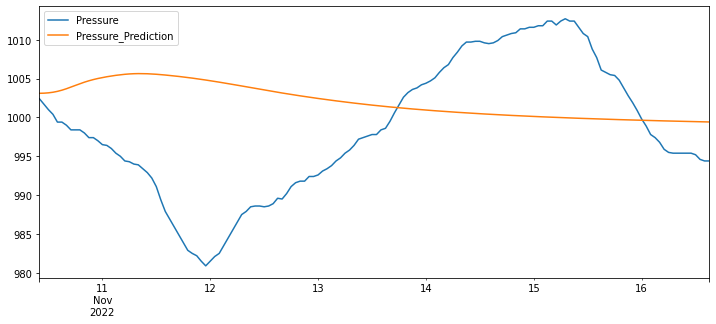

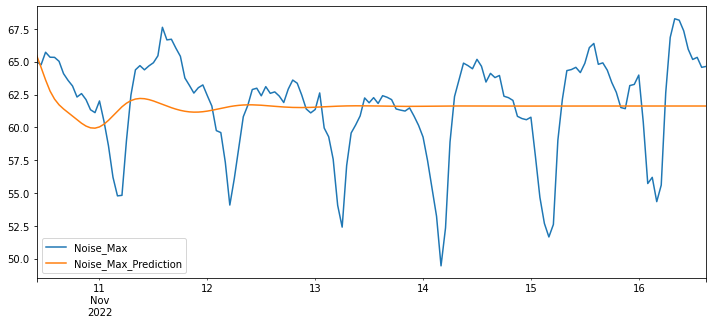

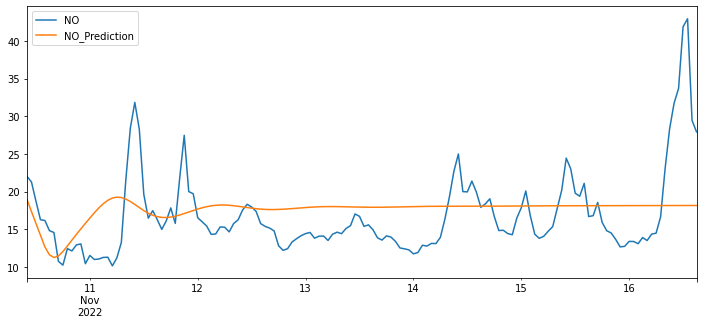

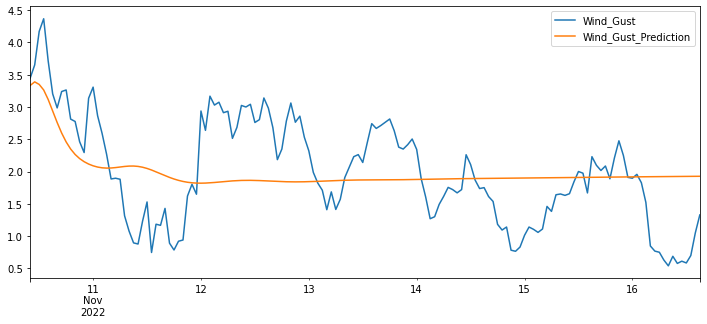

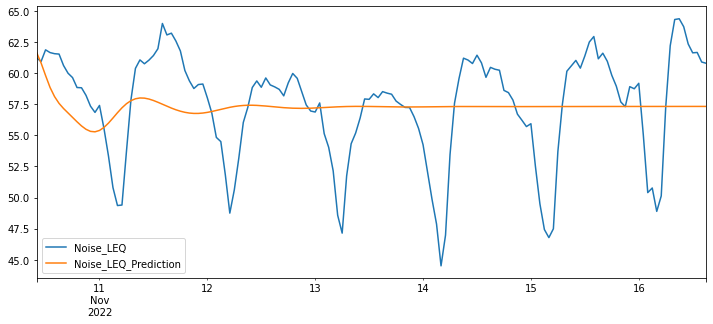

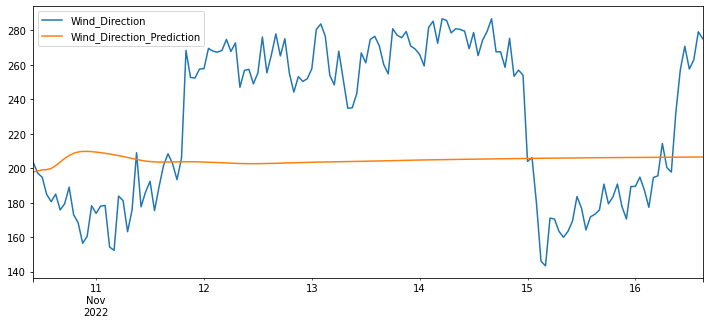

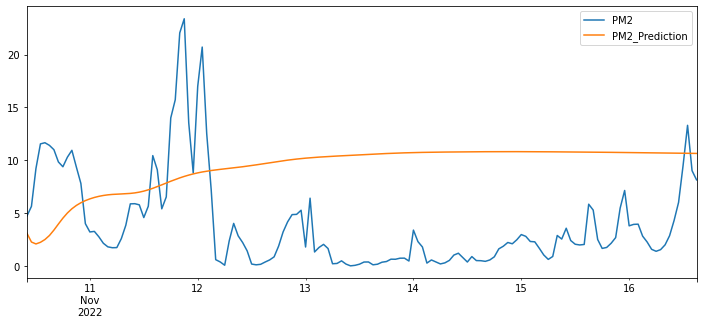

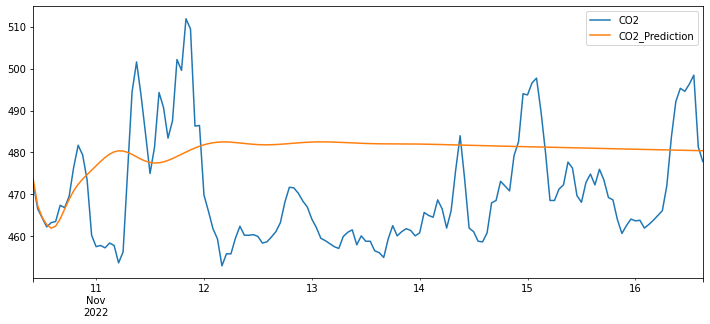

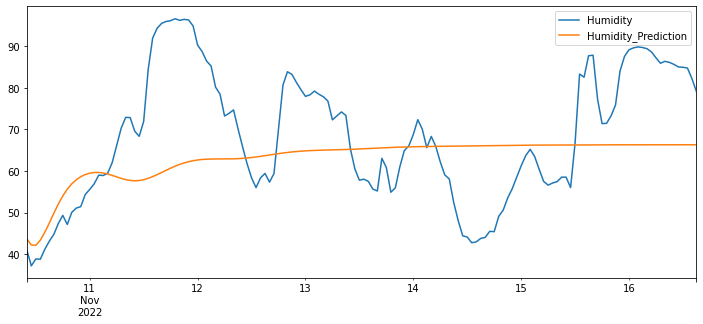

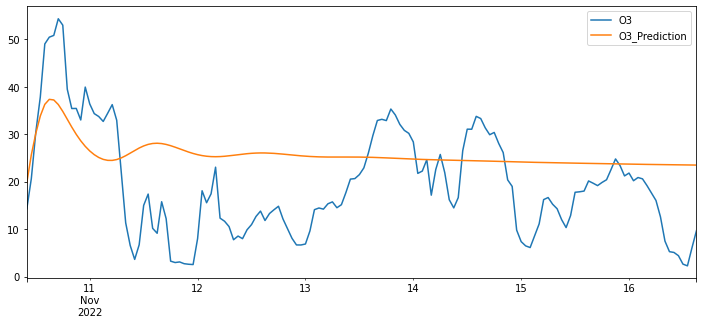

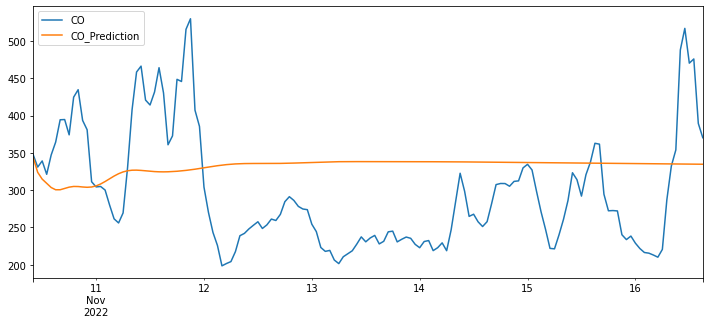

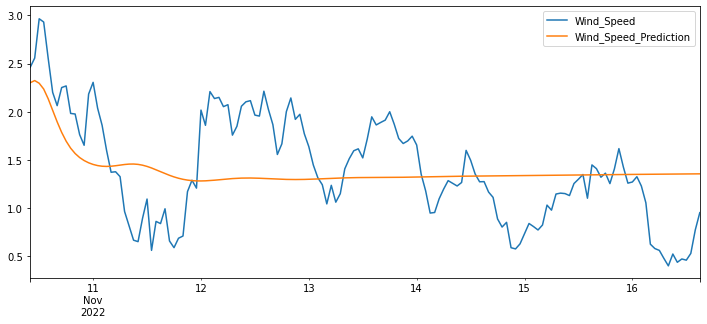

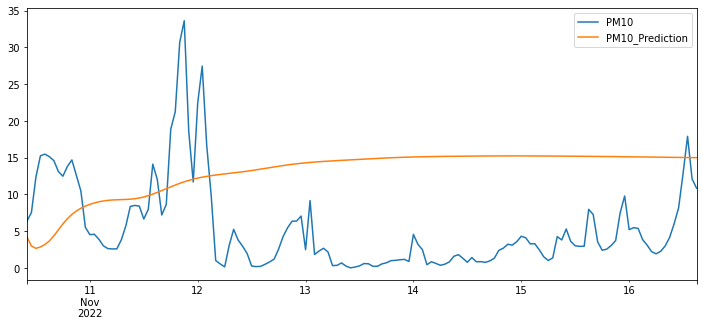

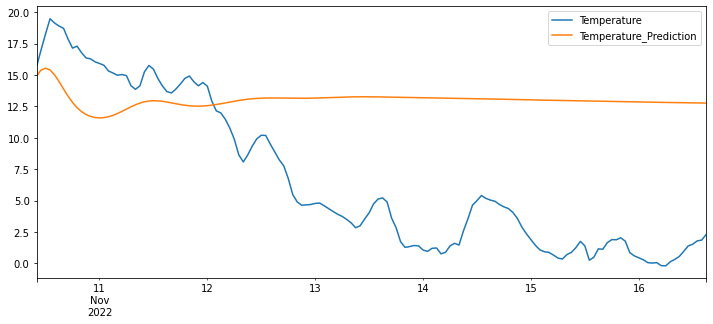

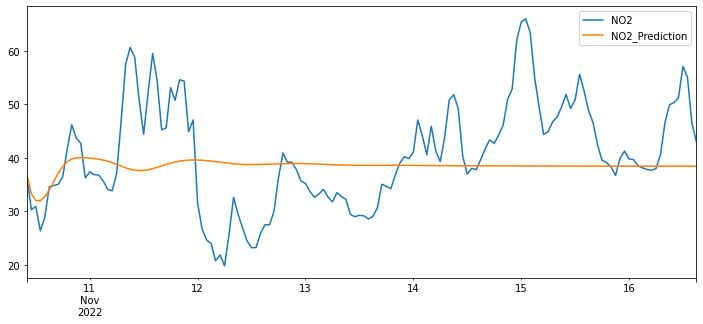

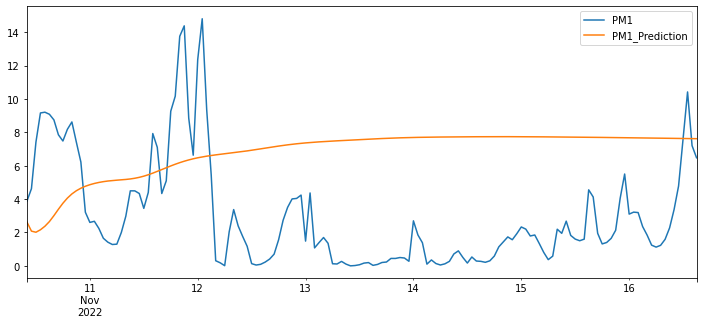

In [43]:
for column in valid_df.columns:
  valid_vs_pred_df.plot(y=[column, column + "_Prediction"],figsize=(12,5))

In [21]:
AR_Term_value_VAR = best_values_VAR['AR_Term'].iloc[0]

print("AR_Term_value_VAR: ", AR_Term_value_VAR)

NameError: ignored

In [ ]:
from hana_ml.algorithms.pal.tsa.vector_arima import VectorARIMA

vectorArima1 = VectorARIMA(order=(-1, 2, -1), model_type = 'VARMA', search_method='grid_search', output_fitted=True, max_p=5, max_q=5)
vectorArima1.fit(data=train)

In [ ]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

In [ ]:
# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

In [ ]:
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,13):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]